## PROBLEM STATEMENT:
 In the highly competitive banking industry, customer retention is a major challenge. It is widely understood that acquiring a new customer is significantly more expensive than retaining an existing one. When customers stop using a bank's services (known as "churning"), it leads to a direct loss of revenue and market share. Therefore, banks need a way to identify at-risk customers before they leave.

 ## OBJECTIVE
 The objective of this project is to build a supervised classification model using the Churn Modelling Dataset to predict the likelihood of a customer leaving the bank.

# IMPORT IMPORTENT LIBRARIES

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [16]:
# Load dataset
df= pd.read_csv('Churn_Modelling.csv')
# Display first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# drop unnecessary columns
df.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [ ]:
# Check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Encode categorical variables
le = LabelEncoder()

# Label Encoding for 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
# One-Hot Encoding for 'Geography' column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [ ]:
# features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# evaluates the performance of the trained classification model
print("Accuracy:", accuracy_score(y_test, y_pred))

# prints detailed classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
# calculates the importance of each feature used in the model.
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


Age                  0.239783
EstimatedSalary      0.146638
CreditScore          0.144214
Balance              0.138613
NumOfProducts        0.130255
Tenure               0.082427
IsActiveMember       0.041110
Geography_Germany    0.025711
Gender               0.019258
HasCrCard            0.018722
Geography_Spain      0.013268
dtype: float64

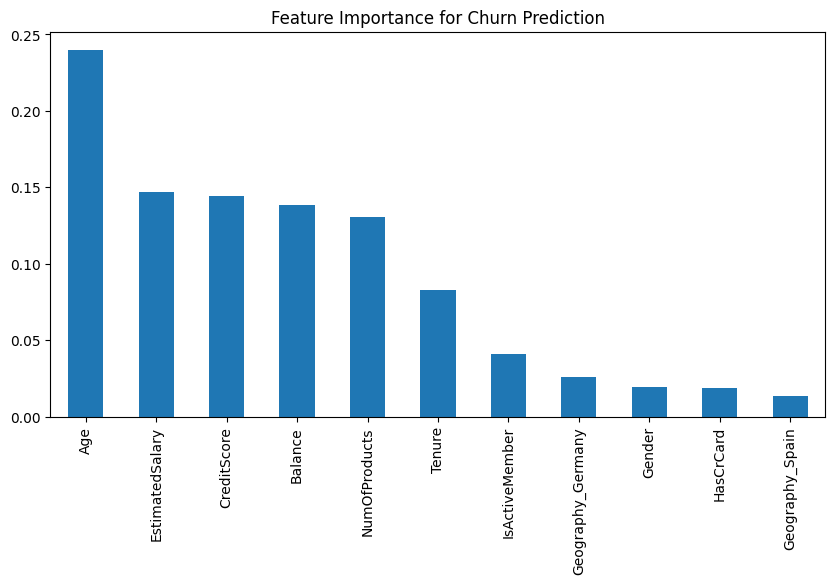

In [ ]:
# Visualize Feature Importance
feature_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance for Churn Prediction")
plt.show()
